# Exploratory Data Analysis 

Presented by - Avinash

Category - Renewals

Designation - Quality Analyst




Quality Analysis Report - September 2022 MTD

Team Abhivyakti

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
ds=pd.read_excel(r'Team Abhivyakti.xlsx', engine='openpyxl')

In [15]:
df=pd.DataFrame(ds)
df.head()

,Timestamp,Audit Date,Email Address,Audit ID,Name of the BDE,BDE's Email ID,Learner's Email ID,Transaction ID (If PSA lead),Line of Business,Call Start Date,...,Slab,Fail Call Feedback Status,Ra/ZT Action,Defective,Month,Week,Date Error,PSA/ Non-PSA,Time,Hourly Slab
0,2022-09-02 10:17:02,2022-09-02,pavankumar.r@unacademy.com,SEPT22PK0001,Ashrupriya gogoi,ashrupriya.gogoi@unacademy.com,deepakpccb@gmail.com,NaN,Renewals,2022-08-31,...,91-100%,NaN,NaN,NaN,September,WK-1,-2,Non PSA,10:17:02,10AM-11AM
1,2022-09-02 10:35:05,2022-09-02,pavankumar.r@unacademy.com,SEPT22PK0002,Esha Arora,esha.arora@unacademy.com,mdsajid7050082949@gmail.com,NaN,Renewals,2022-08-25,...,81-85%,Pending,NaN,Defective,September,WK-1,-3,Non PSA,10:35:05,10AM-11AM
2,2022-09-02 11:39:27,2022-09-02,pavankumar.r@unacademy.com,SEPT22PK0003,Natisha Zindal,natisha.zindal@unacademy.com,arpitakumari2209@gmail.com,NaN,Renewals,2022-08-30,...,91-100%,NaN,NaN,Defective,September,WK-1,-2,Non PSA,11:39:27,11AM-12PM
3,2022-09-02 12:04:43,2022-09-02,pavankumar.r@unacademy.com,SEPT22PK0004,Mohammad Riyazuddin,mohammad.riyazuddin@unacademy.com,namankarwa2004@gmail.com,NaN,Renewals,2022-08-29,...,91-100%,NaN,NaN,Defective,September,WK-1,-2,Non PSA,12:04:43,12PM-1PM
4,2022-09-02 12:38:17,2022-09-02,pavankumar.r@unacademy.com,SEPT22PK0005,Mukund Khandelwal,mukund.khandelwal@unacademy.com,dilipjanwa88@gmail.com,NaN,Renewals,2022-07-28,...,91-100%,NaN,NaN,Defective,September,WK-1,-1,Non PSA,12:38:17,12PM-1PM


In [16]:
# Replace all Nan values to empty string
df = df.replace(np.nan, 'Not Applicable', regex=True)

In [17]:
df = df.replace(to_replace ="None", value ="Not Applicable")

In [28]:
#changing the column name

df.rename(columns={'Sales Pitch-Explain Iconic Features and Benefits': 'Iconic Pitch'}, inplace=True)
df.rename(columns={'Sales Pitch-Explain Plus Features and Benefit\t': 'Plus Features Pitch'}, inplace=True)
df.rename(columns={'Educator credibility:-Learner liking the most, other top educators, along with educator': 'Educator Credibility'}, inplace=True)
df.rename(columns={'Sales Pitch- Did the BDE pitch new launches/new educator or any promotional offers': 'New Promotional Offers'}, inplace=True)
df.rename(columns={'Sales Pitch- Website / App navigation': 'Website Navigation'}, inplace=True)
df.rename(columns={'Sales Pitch- Explain subscription\t': 'Subscription Details'}, inplace=True)
df.rename(columns={'Sales Pitch- Did the BDE ask if learner has Educator code and then pitch for other discount/referral.': 'Educator/Referral/Renewal Code Pitch'}, inplace=True)
df.rename(columns={'Documentation- Documentation - Captured required notes in LS': 'Documentation - Captured Notes in LS'}, inplace=True)
df.rename(columns={'Documentation- Documentation - Send relevant Email as per templates': 'Documentation - Email Templates'}, inplace=True)
df.rename(columns={'Documentation-Documentation - Follow up - Created/completed ': 'Documentation - Follow Up Call Created/Completed'}, inplace=True)
df.rename(columns={'Documentation - Correct lead stage selected as per call scenario': 'Documentation - Correct Lead Stage Selection'}, inplace=True)
df.rename(columns={'Was referral Pitched?': 'Referral Pitch'}, inplace=True)
df.rename(columns={'How effectively the learner referral was pitched?': 'Referral Pitch Effectiveness'}, inplace=True)
df.rename(columns={'Did BDE pitch success story of UPSC Rankers? (177+ UPSC 2021 rankers have used Unacademy platform out of a total of 685 rankers)': 'UPSC 2021 Rankers Pitch'}, inplace=True)


In [ ]:
df.columns

In [ ]:
#Printing the object datatypes and their unique values

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('************************************************************************')
        print('\n')

In [ ]:
df['Score'] = df['Score'].str.replace('%','').astype(float)

In [ ]:
df['Week'] = df['Week'].str.replace('Week','').astype(float)

# Team Adherence Report

Text(0.5, 1.0, 'Documentation - Lead Disposition Adherence')

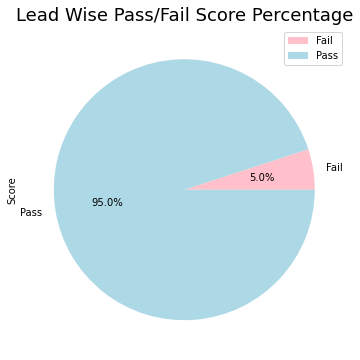

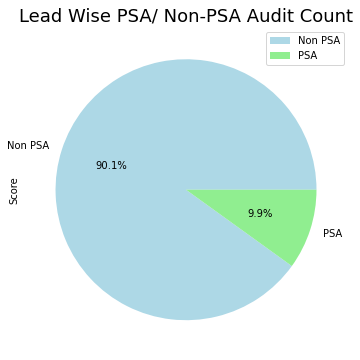

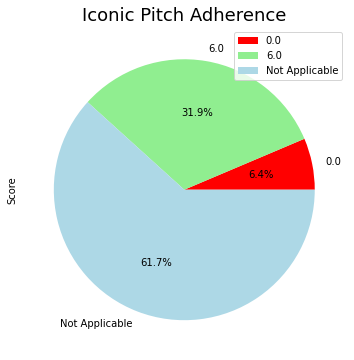

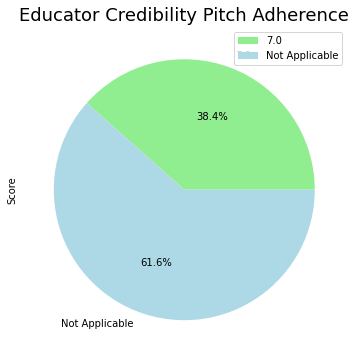

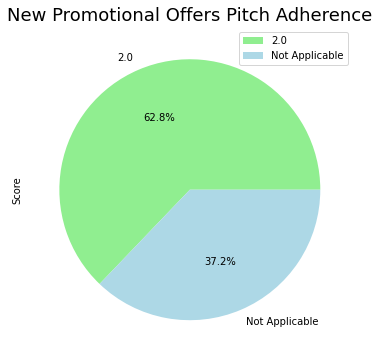

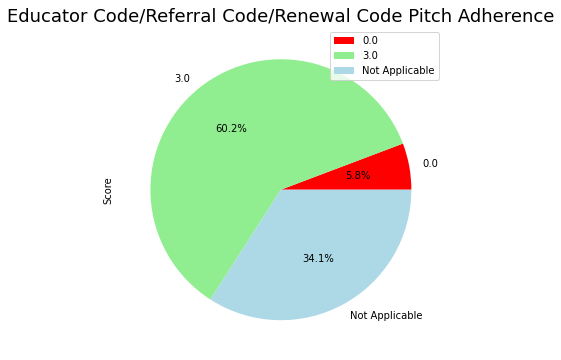

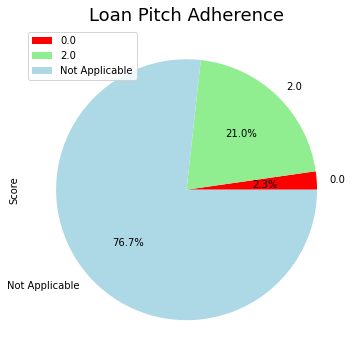

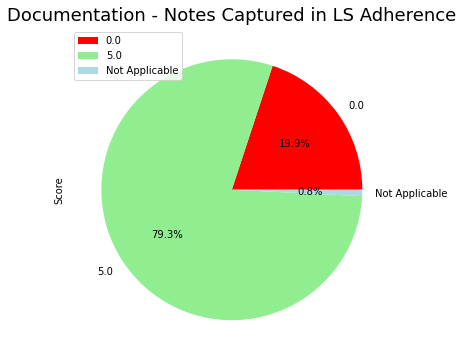

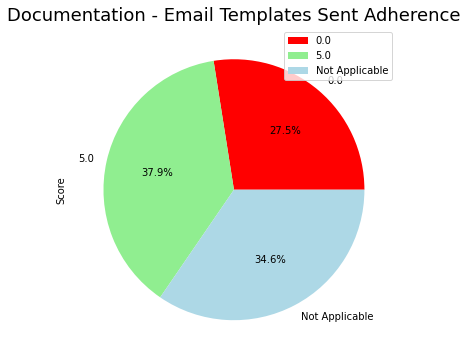

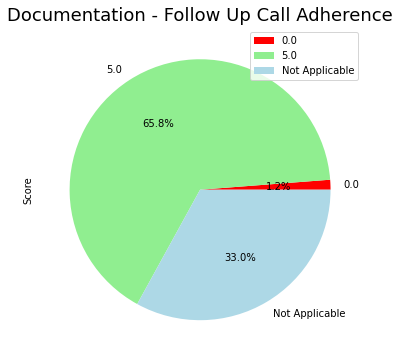

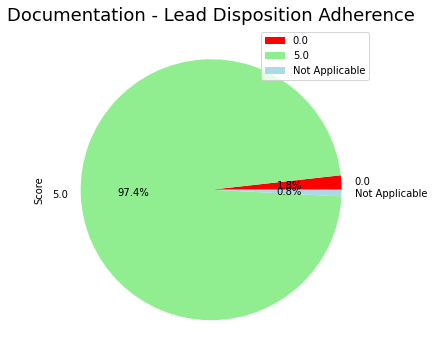

In [84]:
#Parameter Adherence
my_colors = ['pink', 'lightblue']
df.groupby(['Pass/Fail']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Lead Wise Pass/Fail Score Percentage', fontsize=18)

my_colors = ['lightblue', 'lightgreen']
df.groupby(['PSA/ Non-PSA']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Lead Wise PSA/ Non-PSA Audit Count', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Iconic Pitch']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Iconic Pitch Adherence', fontsize=18)

my_colors = ['lightgreen', 'lightblue']
df.groupby(['Educator Credibility']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Educator Credibility Pitch Adherence', fontsize=18)

my_colors = ['lightgreen', 'lightblue']
df.groupby(['New Promotional Offers']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('New Promotional Offers Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Educator/Referral/Renewal Code Pitch']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Educator Code/Referral Code/Renewal Code Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Sales Pitch- Loan']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Loan Pitch Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Captured Notes in LS']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Notes Captured in LS Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Email Templates']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Email Templates Sent Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Follow Up Call Created/Completed']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Follow Up Call Adherence', fontsize=18)

my_colors = ['red', 'lightgreen', 'lightblue']
df.groupby(['Documentation - Correct Lead Stage Selection']).sum().plot(kind='pie', y='Score', figsize=(6,6), autopct='%1.1f%%', colors = my_colors)
plt.title('Documentation - Lead Disposition Adherence', fontsize=18)


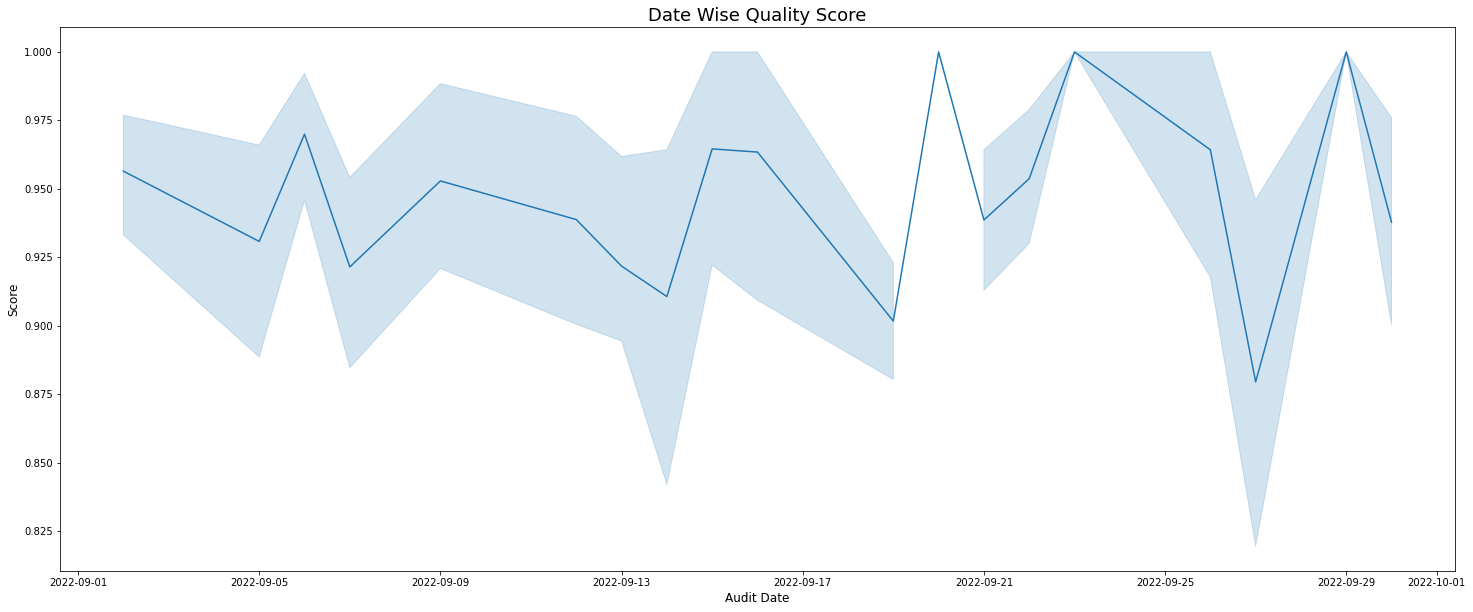

In [34]:
#Date Wise Quality Score
plt.figure(figsize=(25, 10))
sns.lineplot(x="Audit Date", y="Score", data=df)
df.set_index("Audit Date", inplace=True)
plt.title('Date Wise Quality Score', fontsize=18)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Audit Date', fontsize=12)
plt.xticks(rotation=0)
plt.show()

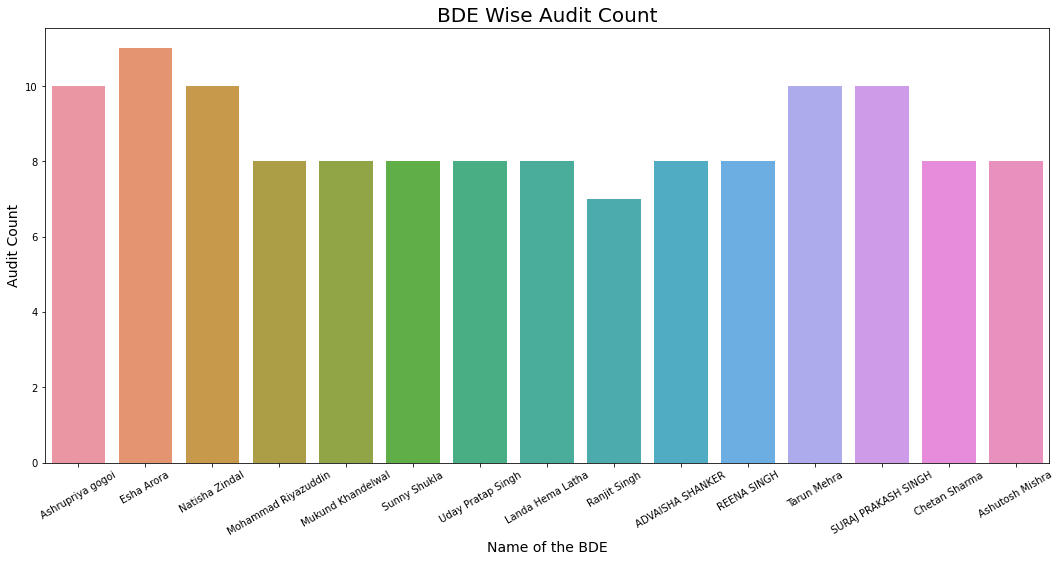

Esha Arora             11
Ashrupriya gogoi       10
Natisha Zindal         10
Tarun Mehra            10
SURAJ PRAKASH SINGH    10
Mohammad Riyazuddin     8
Mukund Khandelwal       8
Sunny Shukla            8
Uday Pratap Singh       8
Landa Hema Latha        8
ADVAISHA SHANKER        8
REENA SINGH             8
Chetan Sharma           8
Ashutosh Mishra         8
Ranjit Singh            7
Name: Name of the BDE, dtype: int64


In [36]:
#BDE Wise Audit Count
plt.figure(figsize=(18, 8))
sns.countplot(df['Name of the BDE'])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Audit Count', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
plt.show()


print(df['Name of the BDE'].value_counts())

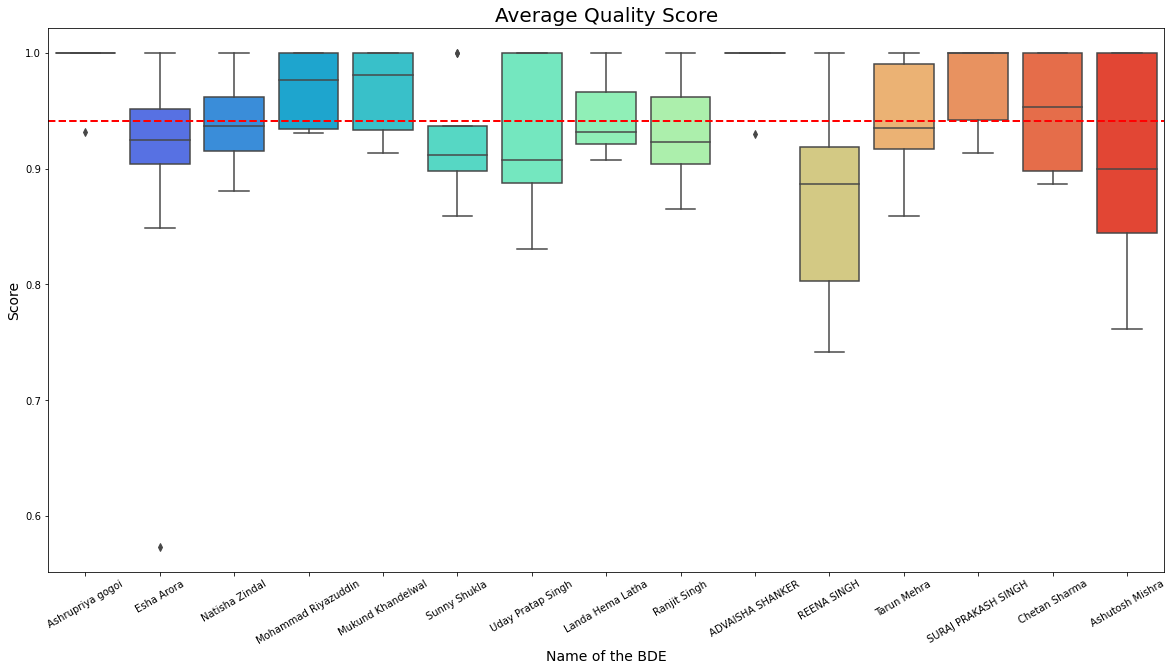

Average Quality Score of the team is - 0.9414137499943651


In [92]:
#Average Quality Score
plt.figure(figsize=(20, 10))
Avg_Score=np.mean(df['Score'])
sns.boxplot(y='Score', x='Name of the BDE', data=df, palette='rainbow')
plt.axhline(Avg_Score, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Average Quality Score', fontsize=20)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
plt.show()

print('Average Quality Score of the team is -', Avg_Score)

In [63]:
#Lead Count Wise Quality Score

print(df['Score'].value_counts())

1.000000    53
0.929577     4
0.915254     4
0.891304     3
0.924242     3
0.907407     3
0.935897     2
0.901961     2
0.864865     2
0.913793     2
0.905660     2
0.934211     2
0.886364     2
0.933333     2
0.926471     2
0.923077     2
0.782609     1
0.858974     1
0.960784     1
0.971429     1
0.573529     1
0.943182     1
0.952381     1
0.880435     1
0.913043     1
0.964286     1
0.917808     1
0.910112     1
0.927711     1
0.930233     1
0.975000     1
0.951613     1
0.912281     1
0.859155     1
0.803922     1
0.965517     1
0.830508     1
0.921875     1
0.868421     1
0.741379     1
0.909091     1
0.907692     1
0.938776     1
0.950820     1
0.928571     1
0.910448     1
0.761905     1
0.800000     1
0.959459     1
0.900000     1
0.875000     1
0.848485     1
0.861111     1
0.897959     1
0.887324     1
0.931507     1
Name: Score, dtype: int64


Text(0.5, 0, 'Name of the BDE')

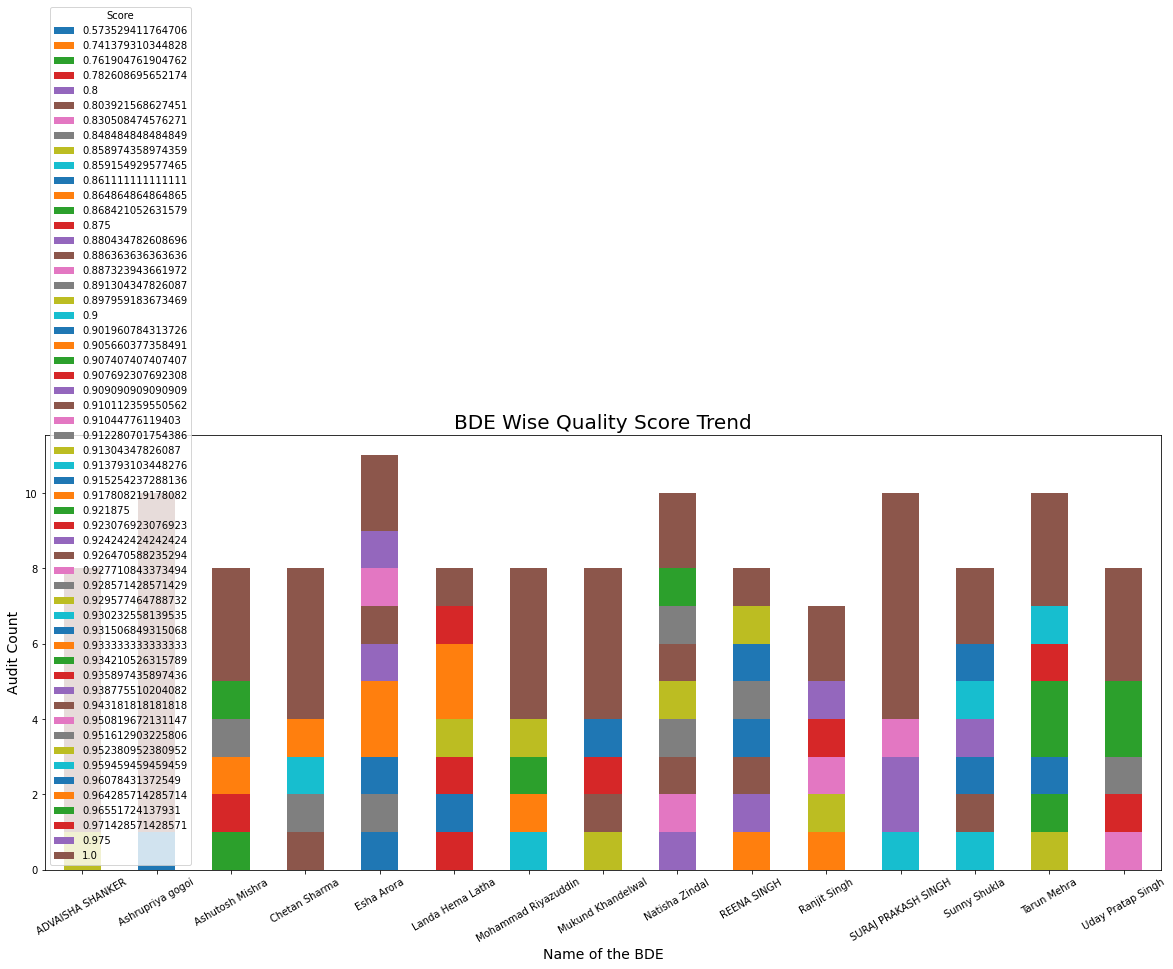

In [49]:
#BDE Wise Quality Score Trend
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
pd.crosstab(df['Name of the BDE'], df['Score']).plot(kind='bar', stacked=True)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Quality Score Trend', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)

Text(0.5, 0, 'Name of the BDE')

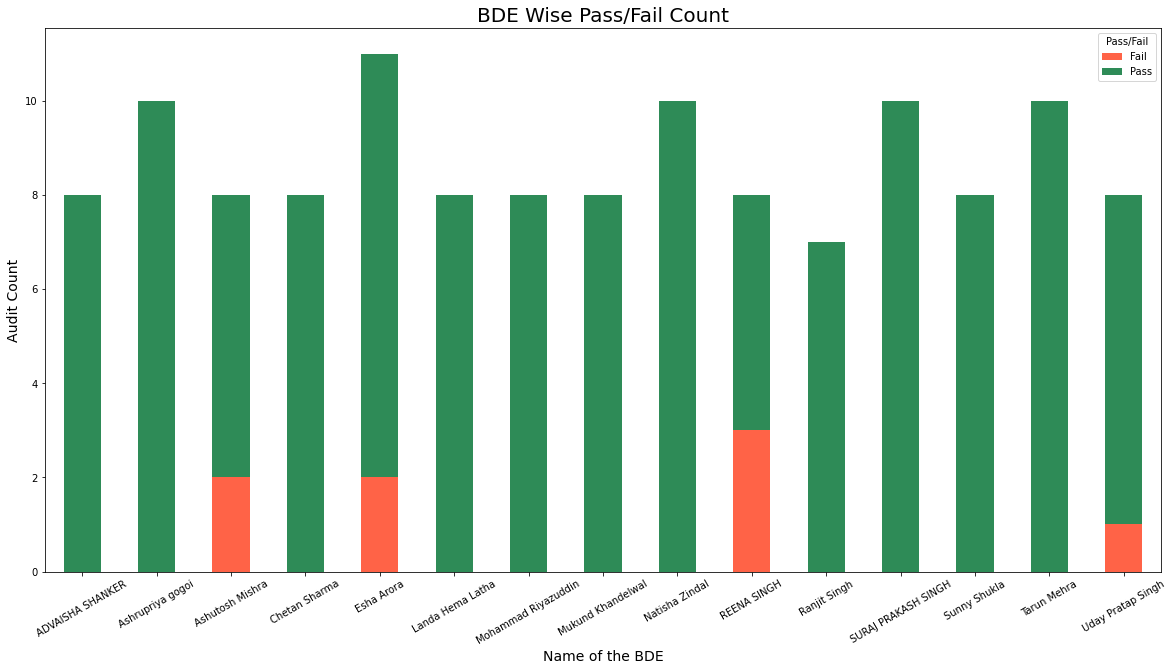

In [50]:
#BDE Wise Pass/Fail Count
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
pd.crosstab(df['Name of the BDE'], df['Pass/Fail']).plot(kind='bar', stacked=True, color =['tomato', 'seagreen'])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('BDE Wise Pass/Fail Count', fontsize=20)
plt.ylabel('Audit Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)

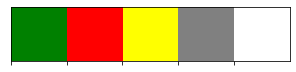

In [82]:
import pandas as pd
import seaborn as sns
  
color = ["green", "Red", "Yellow", "Grey", "White"]
sns.set_palette(color)
sns.palplot(sns.color_palette())

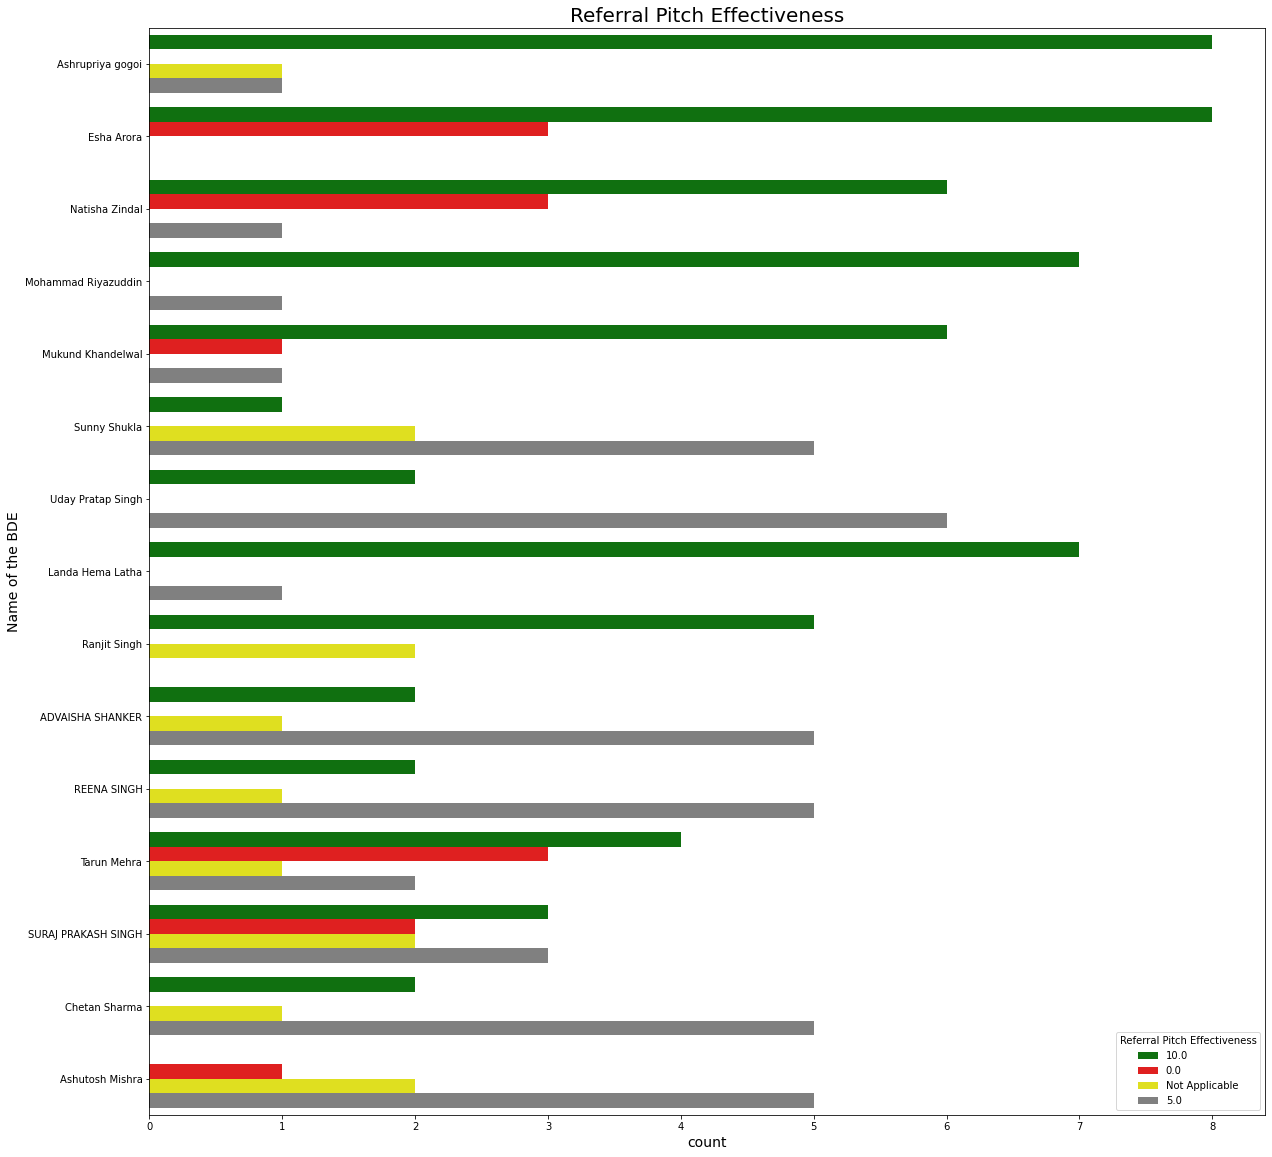

Name of the BDE      Referral Pitch Effectiveness
ADVAISHA SHANKER     5.0                             5
                     10.0                            2
                     Not Applicable                  1
Ashrupriya gogoi     10.0                            8
                     5.0                             1
                     Not Applicable                  1
Ashutosh Mishra      5.0                             5
                     Not Applicable                  2
                     0.0                             1
Chetan Sharma        5.0                             5
                     10.0                            2
                     Not Applicable                  1
Esha Arora           10.0                            8
                     0.0                             3
Landa Hema Latha     10.0                            7
                     5.0                             1
Mohammad Riyazuddin  10.0                            7
               

In [83]:
#Referral Pitch Effectiveness
plt.figure(figsize=(20, 20))
plt.title('Referral Pitch Effectiveness', fontsize=20)
plt.ylabel('Name of the BDE', fontsize=14)
plt.xlabel('Lead Count', fontsize=14)
sns.countplot(y ='Name of the BDE', hue = "Referral Pitch Effectiveness", data = df)
plt.show()
print(df.groupby('Name of the BDE')['Referral Pitch Effectiveness'].value_counts())


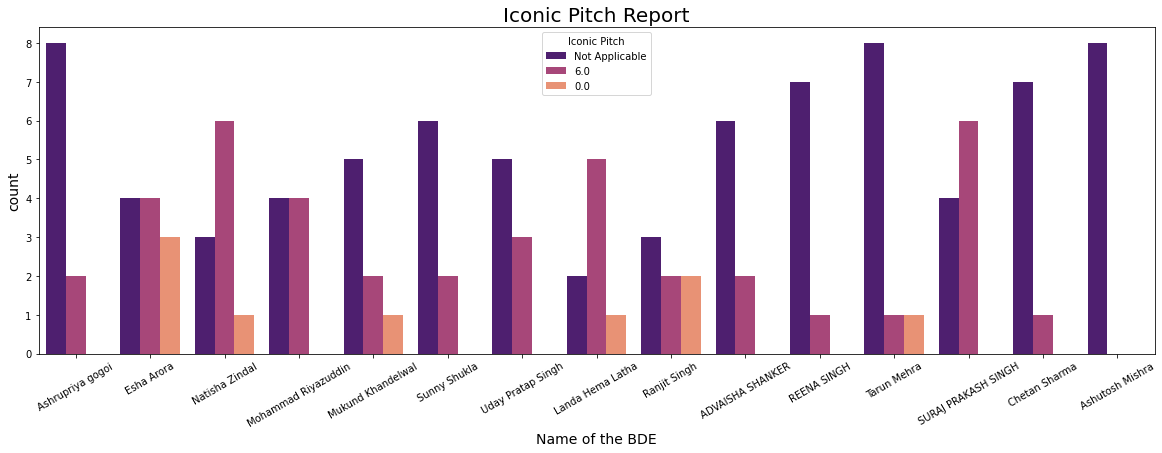

Name of the BDE      Iconic Pitch  
ADVAISHA SHANKER     Not Applicable    6
                     6.0               2
Ashrupriya gogoi     Not Applicable    8
                     6.0               2
Ashutosh Mishra      Not Applicable    8
Chetan Sharma        Not Applicable    7
                     6.0               1
Esha Arora           6.0               4
                     Not Applicable    4
                     0.0               3
Landa Hema Latha     6.0               5
                     Not Applicable    2
                     0.0               1
Mohammad Riyazuddin  6.0               4
                     Not Applicable    4
Mukund Khandelwal    Not Applicable    5
                     6.0               2
                     0.0               1
Natisha Zindal       6.0               6
                     Not Applicable    3
                     0.0               1
REENA SINGH          Not Applicable    7
                     6.0               1
Ranjit Singh         

In [75]:
#Iconic Pitch Report
plt.figure(figsize=(20, 6))
plt.title('Iconic Pitch Report', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Iconic Pitch", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Iconic Pitch'].value_counts())

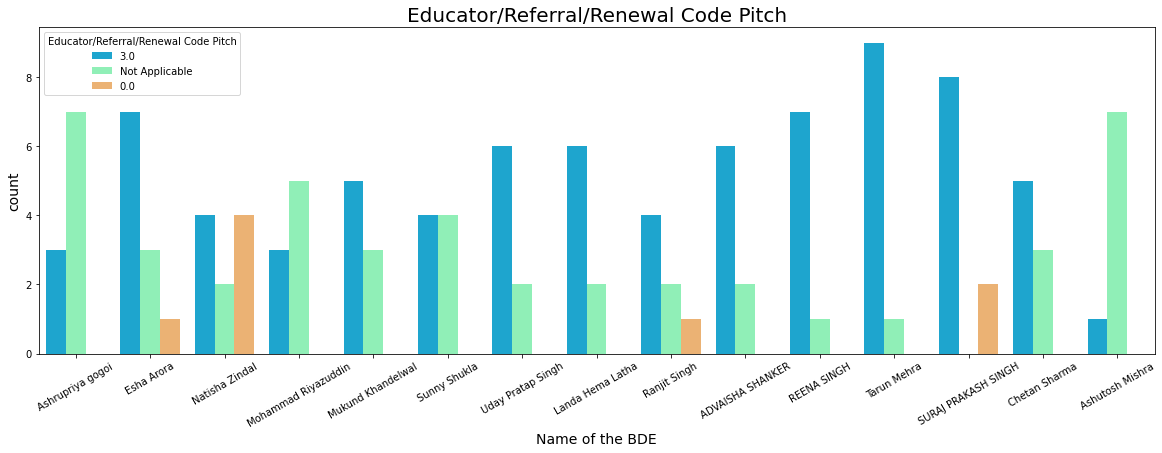

Name of the BDE      Educator/Referral/Renewal Code Pitch
ADVAISHA SHANKER     3.0                                     6
                     Not Applicable                          2
Ashrupriya gogoi     Not Applicable                          7
                     3.0                                     3
Ashutosh Mishra      Not Applicable                          7
                     3.0                                     1
Chetan Sharma        3.0                                     5
                     Not Applicable                          3
Esha Arora           3.0                                     7
                     Not Applicable                          3
                     0.0                                     1
Landa Hema Latha     3.0                                     6
                     Not Applicable                          2
Mohammad Riyazuddin  Not Applicable                          5
                     3.0                                    

In [54]:
#Educator/Referral/Renewal Code Pitch Pitch
plt.figure(figsize=(20, 6))
plt.title('Educator/Referral/Renewal Code Pitch', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Educator/Referral/Renewal Code Pitch", data = df, palette='rainbow')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Educator/Referral/Renewal Code Pitch'].value_counts())

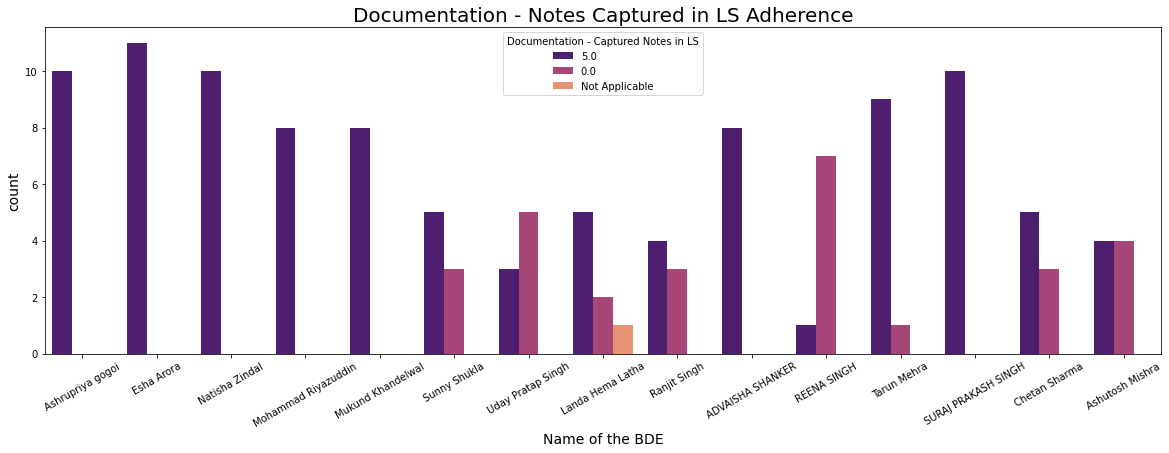

Name of the BDE      Documentation - Captured Notes in LS
ADVAISHA SHANKER     5.0                                      8
Ashrupriya gogoi     5.0                                     10
Ashutosh Mishra      0.0                                      4
                     5.0                                      4
Chetan Sharma        5.0                                      5
                     0.0                                      3
Esha Arora           5.0                                     11
Landa Hema Latha     5.0                                      5
                     0.0                                      2
                     Not Applicable                           1
Mohammad Riyazuddin  5.0                                      8
Mukund Khandelwal    5.0                                      8
Natisha Zindal       5.0                                     10
REENA SINGH          0.0                                      7
                     5.0                      

In [55]:
#Documentation - Notes Captured in LS Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Notes Captured in LS Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Captured Notes in LS", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Captured Notes in LS'].value_counts())

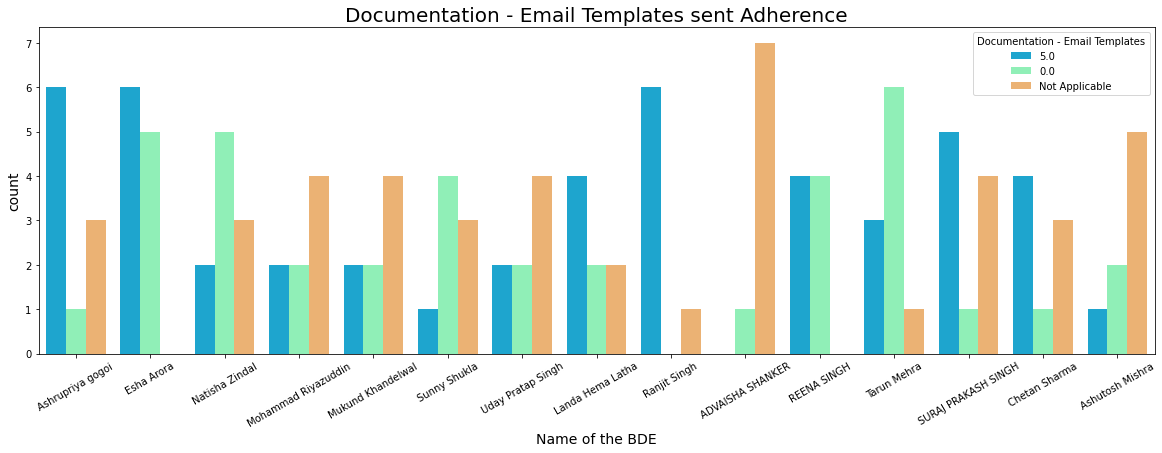

Name of the BDE      Documentation - Email Templates
ADVAISHA SHANKER     Not Applicable                     7
                     0.0                                1
Ashrupriya gogoi     5.0                                6
                     Not Applicable                     3
                     0.0                                1
Ashutosh Mishra      Not Applicable                     5
                     0.0                                2
                     5.0                                1
Chetan Sharma        5.0                                4
                     Not Applicable                     3
                     0.0                                1
Esha Arora           5.0                                6
                     0.0                                5
Landa Hema Latha     5.0                                4
                     0.0                                2
                     Not Applicable                     2
Mohammad Riyazuddin

In [56]:
#Documentation - Email Templates sent Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Email Templates sent Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Email Templates", data = df, palette='rainbow')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Email Templates'].value_counts())

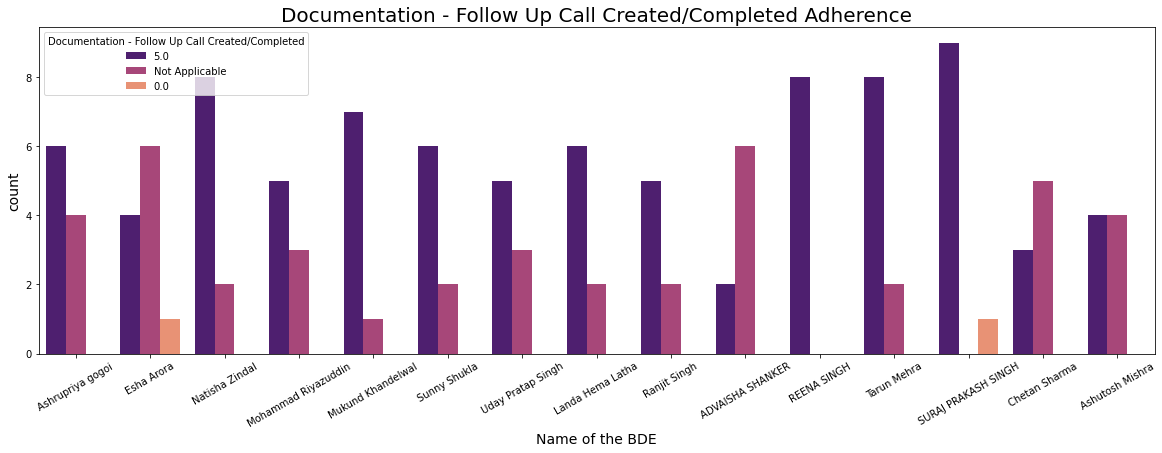

Name of the BDE      Documentation - Follow Up Call Created/Completed
ADVAISHA SHANKER     Not Applicable                                      6
                     5.0                                                 2
Ashrupriya gogoi     5.0                                                 6
                     Not Applicable                                      4
Ashutosh Mishra      5.0                                                 4
                     Not Applicable                                      4
Chetan Sharma        Not Applicable                                      5
                     5.0                                                 3
Esha Arora           Not Applicable                                      6
                     5.0                                                 4
                     0.0                                                 1
Landa Hema Latha     5.0                                                 6
                     Not Appli

In [57]:
#Documentation - Follow Up Call Created/Completed Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Follow Up Call Created/Completed Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Follow Up Call Created/Completed", data = df, palette='magma')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Follow Up Call Created/Completed'].value_counts())

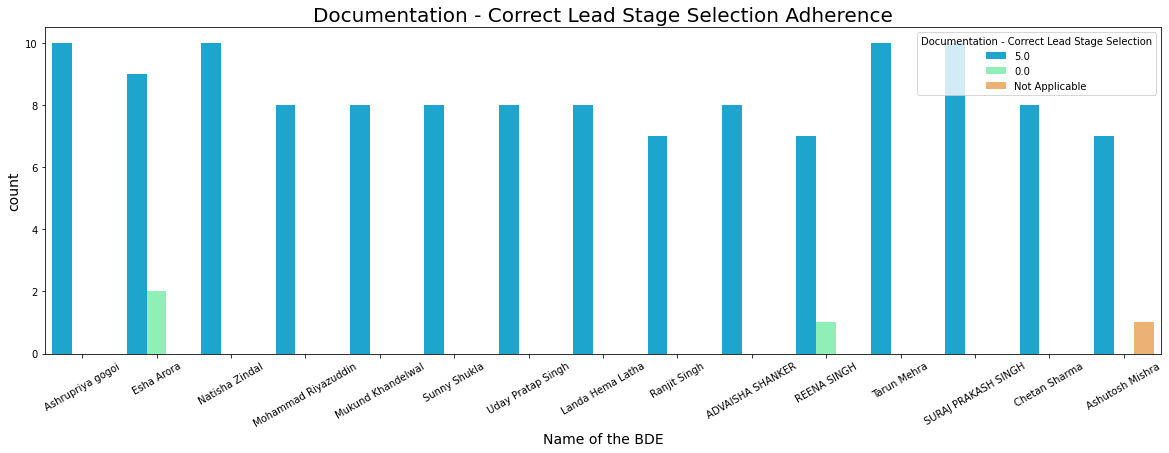

Name of the BDE      Documentation - Correct Lead Stage Selection
ADVAISHA SHANKER     5.0                                              8
Ashrupriya gogoi     5.0                                             10
Ashutosh Mishra      5.0                                              7
                     Not Applicable                                   1
Chetan Sharma        5.0                                              8
Esha Arora           5.0                                              9
                     0.0                                              2
Landa Hema Latha     5.0                                              8
Mohammad Riyazuddin  5.0                                              8
Mukund Khandelwal    5.0                                              8
Natisha Zindal       5.0                                             10
REENA SINGH          5.0                                              7
                     0.0                                              

In [58]:
#Documentation - Correct Lead Stage Selection Adherence
plt.figure(figsize=(20, 6))
plt.title('Documentation - Correct Lead Stage Selection Adherence', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of the BDE', fontsize=14)
sns.countplot(x ='Name of the BDE', hue = "Documentation - Correct Lead Stage Selection", data = df, palette='rainbow')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
print(df.groupby('Name of the BDE')['Documentation - Correct Lead Stage Selection'].value_counts())

The End.